In [182]:
import pandas as pd
import numpy as np

In [183]:
import os
import gc
print(os.listdir("ieee-fraud-detection"))

['test_transaction.csv', 'train_identity.csv', 'test_identity.csv', 'sample_submission.csv', 'train_transaction.csv']


In [126]:
#read the csv file
train_identity_df = pd.read_csv("train_identity.csv")
train_transaction_df = pd.read_csv("train_transaction.csv")



In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
train_identity_df.shape

(144233, 41)

In [129]:
train_transaction_df.shape

(590540, 394)

In [188]:
train_full_df = pd.merge(train_transaction_df, train_identity_df, on='TransactionID', how='left')

In [189]:
train_full_df.shape

(590540, 434)

In [190]:
len(train_full_df[train_full_df['isFraud']==1])/len(train_full_df)*100

3.4990009144173126

In [185]:
### NA values

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

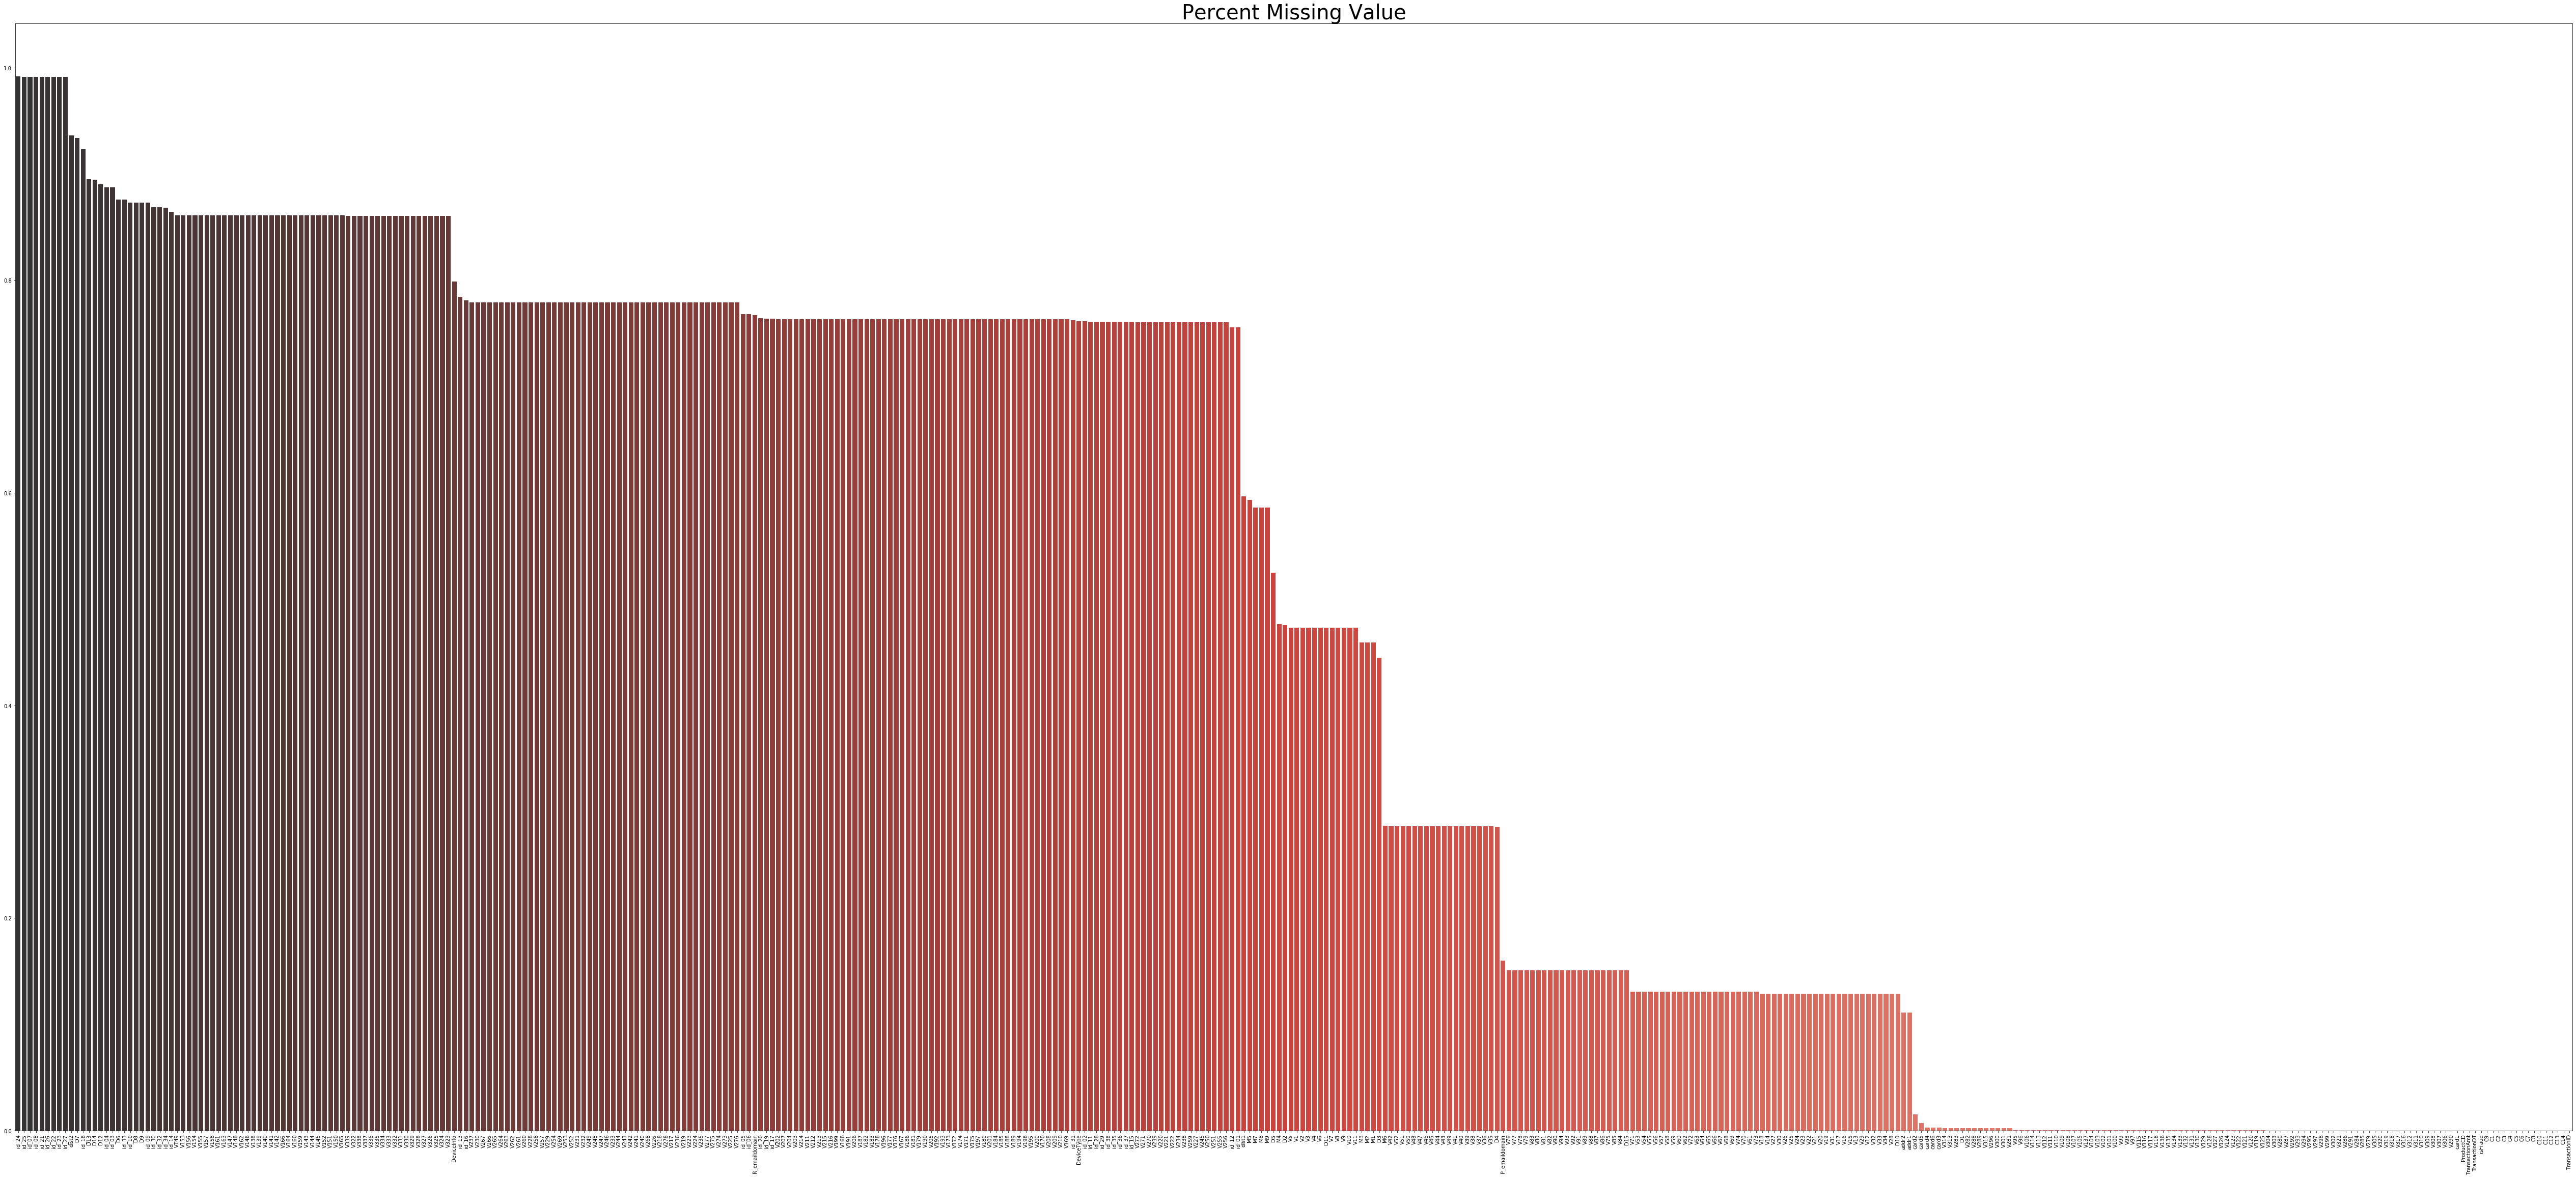

In [192]:
plt.figure(figsize=(90, 40))
sns.barplot(y=train_full_df.isnull().sum().sort_values(ascending=False)/len(train_full_df), 
        x=train_full_df.isnull().sum().sort_values(ascending=False).index,
        palette="Reds_d")
plt.title("Percent Missing Value", size=40)
plt.xticks(rotation=90)

In [138]:
# Data Prep

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
#### Handling NAs:
#Strategies for dealing with NAs:
#-Drop data
#-impute/recode NAs
    

In [195]:
columns_def= pd.DataFrame({"na_count":train_full_df.isnull().sum().sort_values(ascending = False)})


In [196]:
#Create column of percent columns, higher is worst
columns_def["per"]=columns_def['na_count']/len(train_full_df)

In [197]:
columns_def

,na_count,per
id_24,585793,0.991962
id_25,585408,0.991310
id_07,585385,0.991271
id_08,585385,0.991271
id_21,585381,0.991264
id_26,585377,0.991257
id_22,585371,0.991247
id_23,585371,0.991247
id_27,585371,0.991247
dist2,552913,0.936284


In [198]:
#cycle throuhg various limit for percent Na per column
range = [0.05, 0.10, 0.15, 0.25, 0.40, 0.60, 0.75]

In [199]:
for i in range:
    print(columns_def[columns_def["per"]<i].shape[0]/train_full_df.shape[1])

0.25806451612903225
0.25806451612903225
0.3686635944700461
0.41935483870967744
0.46543778801843316
0.5207373271889401
0.5207373271889401


In [200]:
limit=0.15 #only columns with less 15% will remain


In [201]:
#select final columns
columns_final= columns_def[columns_def["per"]<limit].index

train_full_df= train_full_df[train_full_df.columns.intersection(columns_final)]

In [202]:
train_full_df.shape

(590540, 160)

In [203]:
####Dealing with Categorical Variables


In [204]:
#show categorical variables
train_full_df[train_full_df.select_dtypes(include=['object']).columns]

,ProductCD,card4,card6
0,W,discover,credit
1,W,mastercard,credit
2,W,visa,debit
3,W,mastercard,debit
4,H,mastercard,credit
5,W,visa,debit
6,W,visa,debit
7,W,visa,debit
8,H,visa,debit
9,W,mastercard,debit


In [205]:
card6_dummy_df= pd.get_dummies(train_full_df["card6"])

In [206]:
card6_dummy_df

,charge card,credit,debit,debit or credit
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
5,0,0,1,0
6,0,0,1,0
7,0,0,1,0
8,0,0,1,0
9,0,0,1,0


In [207]:
train_full_df.shape

(590540, 160)

In [227]:
train_full_df=pd.concat([train_full_df,card6_dummy_df],axis=1)

In [228]:
train_full_df=train_full_df._get_numeric_data() 
#dropping categorical but keeping numerical

In [229]:
train_full_df=train_full_df.dropna()
len(train_full_df[train_full_df["isFraud"]==1])/len(train_full_df)*100

2.04579077462003

In [230]:
#create data frame for x varaibles and y variables we are looking to predict
x_full_df=train_full_df.drop(["isFraud"], axis=1)
y_full_df=train_full_df["isFraud"]

In [231]:
x_train,x_test,y_train,y_test=train_test_split(x_full_df,y_full_df,test_size=0.50)


In [232]:
##Modeling

In [233]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [242]:
LR = LogisticRegression(solver='lbfgs')
LR.fit(x_train, y_train)

/Users/sammcg/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [243]:
LR.score(x_test, y_test)

0.9792929038866963

In [244]:
y_pred=LR.predict(x_test)

In [245]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,0.0,1.0,All
True,,,
0.0,214120,72,214192
1.0,4456,21,4477
All,218576,93,218669


In [246]:
accuracy_score(y_test, y_pred)

0.9792929038866963

In [247]:
recall_score(y_test, y_pred)

0.004690641054277418